In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import MESS
import numpy as np
import pandas as pd

from IPython.display import display

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


## Use the Reunion spider data for testing
First quickly munge the spider data into the form we need.

In [4]:
sp_dir = "/home/iovercast/Continuosity/MESS/empirical_data/Reunion_spiders/"
sp_abunds = pd.read_csv(sp_dir + "spider_abunds_df.txt", index_col=0, header=0)
sp_pis = pd.read_csv(sp_dir + "spider.pis", sep=" ", index_col=1, header=None)
sp_pis.index = [x.split("/")[1].split(".")[0] for x in sp_pis.index]
sp_df = pd.concat([sp_abunds, sp_pis], axis=1, sort=False)
sp_df.columns = ["abundance", "pi"]
sp_df.to_csv(sp_dir + "spider.dat", header=True)
print(len(sp_df), np.sum(sp_df["abundance"]))
sp_df[:5]

(57, 5493)


,abundance,pi
GL-01a,150,0.011126
GL-01b,107,0.023247
GL-01c,32,0.000252
GL-02,2,0.000000
GL-03,200,0.028499


# Select the best model

In [5]:
simfile = "/home/iovercast/Continuosity/MESS/analysis/full-parameter-estimation/default_MESS/SIMOUT.txt"

cla = MESS.inference.Classifier(empirical_df=sp_df, simfile=simfile, algorithm="rf")
est, proba = cla.predict(select_features=True, param_search=True, quick=False, verbose=True)
display(est, proba)
display(cla.feature_importances())

Selecting features:
  community_assembly_model	['S', 'abund_h1', 'abund_h2', 'abund_h3', 'abund_h4', 'pi_h1', 'pi_h2', 'pi_h3', 'pi_h4', 'mean_pi', 'std_pi', 'skewness_pi', 'kurtosis_pi', 'median_pi', 'iqr_pi', 'abundance_pi_cor', 'SGD_0', 'SGD_1', 'SGD_2', 'SGD_3', 'SGD_4']
All selected features: S abund_h1 abund_h2 abund_h3 abund_h4 pi_h1 pi_h2 pi_h3 pi_h4 mean_pi std_pi skewness_pi kurtosis_pi median_pi iqr_pi abundance_pi_cor SGD_0 SGD_1 SGD_2 SGD_3 SGD_4
Finding best model parameters.
Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 30.4min finished


{'n_estimators': 1600, 'min_samples_split': 5, 'bootstrap': True, 'max_depth': 40, 'min_samples_leaf': 1}


,community_assembly_model
estimate,neutral


,competition,filtering,neutral
community_assembly_model,0.001972,0.077635,0.920394


,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,abundance_pi_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4
Feature importance,0.042535,0.135008,0.070352,0.066336,0.067117,0.044634,0.038224,0.034205,0.032625,0.072548,0.102285,0.03834,0.037426,0.008808,0.045756,0.047208,0.039325,0.034415,0.015338,0.015308,0.012208


array([<matplotlib.axes._subplots.AxesSubplot object at 0x2aab4133fbd0>],
      dtype=object)

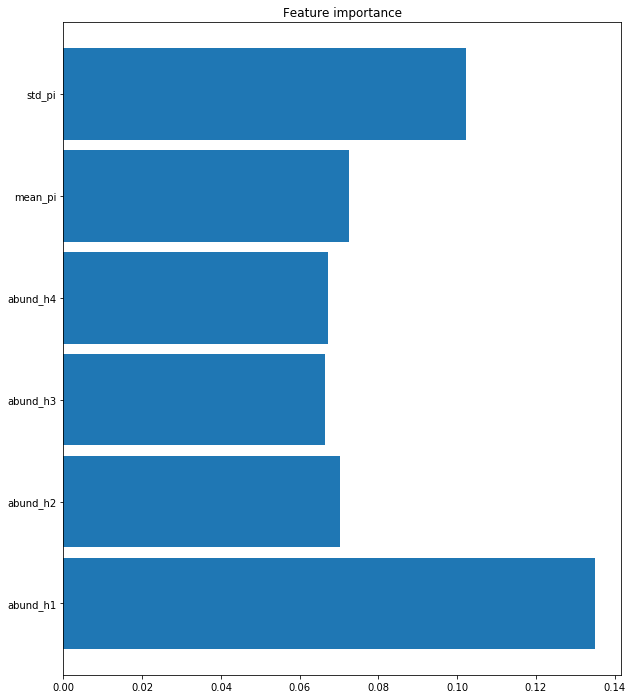

In [6]:
cla.plot_feature_importance()

# Estimate parameters

In [ ]:
simfile = "/home/iovercast/Continuosity/MESS/analysis/full-parameter-estimation/default_MESS/SIMOUT.txt"

rgr = MESS.inference.Regressor(empirical_df=sp_df, simfile=simfile, algorithm="rfq")

est = rgr.predict(select_features=True, param_search=True, quick=False, verbose=True)
display(est, rgr.feature_importances())

Selecting features:
  alpha	['S', 'abund_h1', 'abund_h2', 'abund_h3', 'abund_h4', 'pi_h1', 'pi_h2', 'pi_h3', 'pi_h4', 'mean_pi', 'std_pi', 'skewness_pi', 'kurtosis_pi', 'median_pi', 'iqr_pi', 'abundance_pi_cor', 'SGD_0', 'SGD_1']
  ecological_strength	['abund_h1', 'abund_h2', 'abund_h4', 'std_pi', 'abundance_pi_cor', 'SGD_0', 'SGD_1']
  J	['S', 'abund_h1', 'abund_h2', 'abund_h3', 'abund_h4', 'pi_h1', 'pi_h2', 'pi_h3', 'pi_h4', 'mean_pi', 'std_pi', 'skewness_pi', 'kurtosis_pi', 'median_pi', 'iqr_pi', 'abundance_pi_cor', 'SGD_0', 'SGD_5']
  m	['S', 'abund_h1', 'abund_h2', 'pi_h1', 'pi_h2', 'pi_h3', 'pi_h4', 'mean_pi', 'std_pi', 'skewness_pi', 'abundance_pi_cor', 'SGD_0']
  generation	['S', 'abund_h1', 'abund_h2', 'abund_h3', 'abund_h4', 'pi_h1', 'mean_pi', 'std_pi', 'abundance_pi_cor', 'SGD_0']
  speciation_prob	

In [12]:
display(est, rgr.feature_importances())

,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,8026.379411,2.391509,3858.014180,0.005087,693.501399,0.000835,0.897375
lower 0.025,5421.434591,0.012172,2486.118245,0.001180,307.170108,0.000510,0.816540
upper 0.975,9743.000000,8.838456,4938.073333,0.009850,1426.720287,0.001440,0.988221


,S,SGD_0,SGD_1,SGD_2,SGD_3,SGD_5,abund_h1,abund_h2,abund_h3,abund_h4,abundance_pi_cor,iqr_pi,kurtosis_pi,mean_pi,median_pi,pi_h1,pi_h2,pi_h3,pi_h4,skewness_pi,std_pi
alpha,0.018478,0.108291,0.012118,NaN,NaN,NaN,0.100294,0.021805,0.016514,0.021766,0.093989,0.092016,0.025935,0.044227,0.277649,0.040156,0.019919,0.014243,0.017476,0.031192,0.043932
ecological_strength,NaN,0.117641,0.045218,NaN,NaN,NaN,0.223251,0.136875,NaN,0.140889,0.177419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158708
J,0.271986,0.024103,NaN,NaN,NaN,0.012191,0.162758,0.037234,0.033067,0.044243,0.065923,0.018126,0.031276,0.033708,0.006297,0.059962,0.051173,0.032230,0.026567,0.029183,0.059973
m,0.051475,0.188938,NaN,NaN,NaN,NaN,0.096359,0.089711,NaN,NaN,0.123445,NaN,NaN,0.058613,NaN,0.043681,0.036804,0.042106,0.075993,0.068996,0.123879
generation,0.056673,0.032579,NaN,NaN,NaN,NaN,0.092470,0.396503,0.034819,0.073228,0.047913,NaN,NaN,0.036618,NaN,0.041956,NaN,NaN,NaN,NaN,0.187241
speciation_prob,0.059926,0.463289,NaN,0.014739,0.011814,0.011880,0.034591,0.016921,0.013877,0.017525,0.040525,0.013746,NaN,0.061842,NaN,0.019796,0.012469,0.010653,0.014970,NaN,0.181437
_lambda,0.023890,0.093520,NaN,NaN,NaN,0.008086,0.104881,0.031193,0.048744,0.543460,0.034051,0.009701,NaN,0.038174,NaN,0.019828,NaN,NaN,NaN,NaN,0.044474


## Perform posterior predictive check

  [####################] 100% Performing simulations 
Calculating PCs and plotting


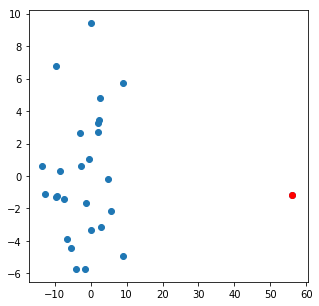

In [22]:
MESS.inference.posterior_predictive_check(empirical_df=sp_df,
                                          parameter_estimates=est,
                                          est_only=True,
                                          nsims=20,
                                          verbose=True)

## Save regressor to file/model to file

In [150]:
rgr.feature_importances()
#rgr.model_by_target

,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,trees,abundance_pi_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
alpha,0.015795,0.066961,0.018036,0.012658,0.025727,0.027068,0.009332,0.002480,0.002773,0.275834,0.008189,0.022957,0.010469,0.004996,0.369852,0.0,0.059932,0.050365,0.001897,0.001806,0.002297,0.002108,0.004731,0.002443,0.000570,0.000000,0.000721
_lambda,0.006080,0.018718,0.006266,0.040721,0.859859,0.003194,0.001113,0.004015,0.001348,0.009954,0.010465,0.003409,0.005999,0.001550,0.002724,0.0,0.006535,0.013376,0.001096,0.000300,0.000758,0.000035,0.000916,0.000294,0.000857,0.000169,0.000251


# Trash below here

,competition,filtering,neutral
community_assembly_model,0.74625,0.025833,0.227917


  NB: No features found relevant for target J_m
      Fall back to using all parameters.


,alpha,J_m,ecological_strength,m,speciation_prob,_lambda
estimate,3696.930982,2.658593e+06,4.465569,0.005156,0.000833,0.910659
lower 0.025,1336.375590,1.327991e+05,1.526813,0.001312,0.000118,0.808775
upper 0.975,4926.031178,4.887587e+06,9.596386,0.009544,0.004088,0.998372


,S,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9,abund_h1,abund_h2,abund_h3,abund_h4,abundance_pi_cor,iqr_pi,kurtosis_pi,mean_pi,median_pi,pi_h1,pi_h2,pi_h3,pi_h4,skewness_pi,std_pi,trees
alpha,NaN,0.055138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088699,0.026735,0.021461,0.024905,0.066885,0.316790,0.034617,0.269218,0.006336,0.054150,NaN,NaN,NaN,0.035065,NaN,NaN
J_m,0.053238,0.048200,0.033212,0.033269,0.029151,0.025702,0.03047,0.020942,0.016635,0.014345,0.020083,0.060234,0.042796,0.034577,0.039778,0.098288,0.021022,0.062817,0.042728,0.004054,0.046849,0.036924,0.032327,0.041186,0.061366,0.049807,0.0
ecological_strength,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
m,0.329681,0.061032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084335,0.050196,0.041593,0.051049,0.117748,NaN,NaN,0.051919,NaN,NaN,NaN,NaN,0.067449,0.071112,0.073885,NaN
speciation_prob,0.235190,0.168127,NaN,0.013811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.198409,0.027797,0.033306,0.077287,NaN,0.023754,NaN,0.068064,NaN,0.043962,0.016174,0.014271,0.018357,NaN,0.061490,NaN
_lambda,NaN,0.025444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047443,0.026725,0.078086,0.776453,NaN,NaN,NaN,0.019045,NaN,NaN,NaN,NaN,NaN,NaN,0.026804,NaN


  [####################] 100% Performing simulations 
Calculating PCs and plotting


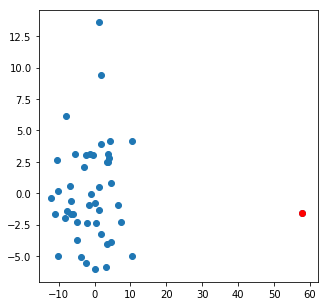

In [23]:
simfile = "/home/isaac/Continuosity/MESS/analysis/full-parameter-estimation/SIMOUT.txt"

cla = MESS.inference.Classifier(empirical_df=sp_df, simfile=simfile)
est, proba = cla.predict()
display(proba)

rgr = MESS.inference.Regressor(empirical_df=sp_df, simfile=simfile)
est = rgr.predict()
display(est, rgr.feature_importances())

MESS.inference.posterior_predictive_check(empirical_df=sp_df,
                                          parameter_estimates=est,
                                          est_only=True,
                                          nsims=20,
                                          verbose=True)

In [218]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
abc = AdaBoostClassifier()
abc.fit(cla.X, cla.y)
abc.predict(cla.empirical_sumstats)

abr = AdaBoostRegressor()
abr.fit(rgr.X, rgr.y["alpha"])
abr.predict(rgr.empirical_sumstats)

array([4128.40555556])

(array([445., 607., 143., 188., 174., 153., 142.,  93.,  32.,  10.]),
 array([  3. ,  32.1,  61.2,  90.3, 119.4, 148.5, 177.6, 206.7, 235.8,
        264.9, 294. ]),
 <a list of 10 Patch objects>)

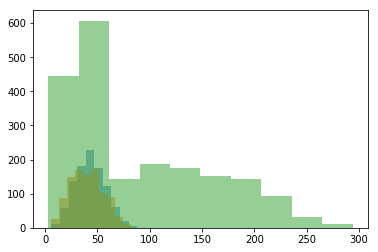

In [32]:
df = pd.read_csv(simfile, sep="\t", header=0)
param = "S"
plt.hist(df[df["community_assembly_model"] == "competition"][param], alpha=.5)
plt.hist(df[df["community_assembly_model"] == "filtering"][param], alpha=.5)
plt.hist(df[df["community_assembly_model"] == "neutral"][param], alpha=.5)


In [25]:
cla.feature_importances()

,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,abundance_pi_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4
Feature importance,0.104787,0.147012,0.062519,0.058322,0.059917,0.059802,0.049695,0.049071,0.045937,0.042155,0.046642,0.035952,0.034173,0.00403,0.022879,0.037079,0.075653,0.018427,0.017443,0.016786,0.011719
